In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB
None


Сразу переведем столбец "Дата" в правильный формат

In [19]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [20]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [21]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

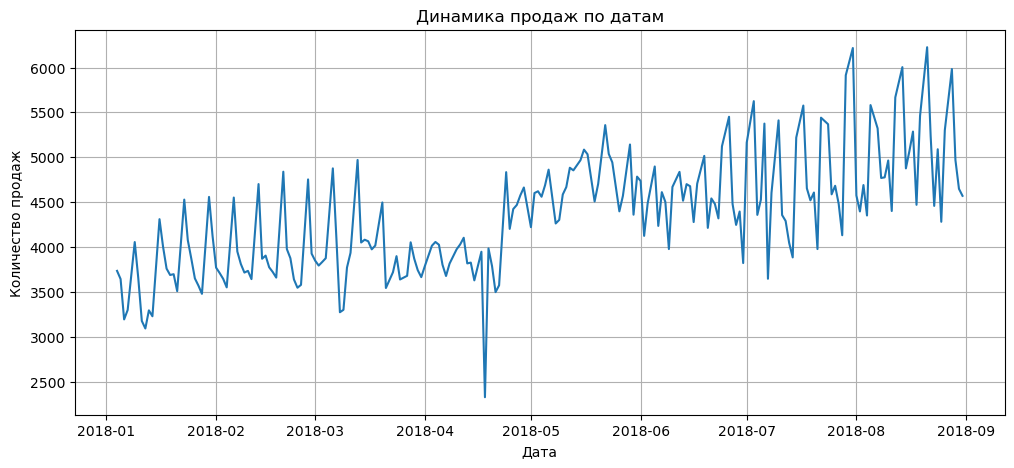

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], linestyle='-')
plt.title("Динамика продаж по датам")
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.grid(True)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [5]:
print('''Общий тренд
 С января по август продажи постепенно растут.
 Если в начале года было около 3,2–4 тыс., то к августу уже 5,5–6 тыс.
Колебания
 Видны регулярные "пики" и "провалы" примерно каждую неделю.
 Это может быть связано с выходными или расписанием работы магазина.
Выбросы
 В апреле был сильный спад до ~2200, что выбивается из общей картины.
 Июль–август наоборот были резкие всплески выше 6000.
Сезонность
 С мая продажи заметно растут, особенно летом.
 Возможно, это связано с сезонным спросом.

Январь–апрель были более спокойными, без сильных скачков.
После мая тренд пошёл вверх.

Видно, что продажи увеличиваются, но при этом есть сильная недельная сезонность и отдельные выбросы''')

Общий тренд
 С января по август продажи постепенно растут.
 Если в начале года было около 3,2–4 тыс., то к августу уже 5,5–6 тыс.
Колебания
 Видны регулярные "пики" и "провалы" примерно каждую неделю.
 Это может быть связано с выходными или расписанием работы магазина.
Выбросы
 В апреле был сильный спад до ~2200, что выбивается из общей картины.
 Июль–август наоборот были резкие всплески выше 6000.
Сезонность
 С мая продажи заметно растут, особенно летом.
 Возможно, это связано с сезонным спросом.

Январь–апрель были более спокойными, без сильных скачков.
После мая тренд пошёл вверх.

Видно, что продажи увеличиваются, но при этом есть сильная недельная сезонность и отдельные выбросы


Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [23]:
max_sales_row = df.loc[df['Количество'].idxmax()]
print(max_sales_row)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [24]:
df['Месяц'] = df['Дата'].dt.month
df['ДеньНедели'] = df['Дата'].dt.day_name()

summer_wed = df[
    (df['Месяц'].isin([6, 7, 8])) &
    (df['ДеньНедели'] == 'Wednesday') &
    (df['Склад'] == 3)]

top_product = summer_wed.groupby('Номенклатура')['Количество'].sum().reset_index()
top_product = top_product.sort_values('Количество', ascending=False).head(1)

print(top_product)

  Номенклатура  Количество
1    product_1        2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [33]:
weather = pd.read_csv(
    "astana_pogoda.csv",
    encoding="utf-8",
    skiprows=6,
    sep=";",
    index_col=False   # 👈 добавляем это, чтобы не тащить даты в индекс
)

# Преобразуем дату
weather["Дата"] = pd.to_datetime(weather["Местное время в Астане"], dayfirst=True).dt.date

# Температура (преобразуем к числу)
weather["T"] = pd.to_numeric(weather["T"], errors="coerce")

# Среднесуточная температура
daily_temp = weather.groupby("Дата")["T"].mean().reset_index()

# Приводим grouped_df к тому же типу
grouped_df["Дата"] = pd.to_datetime(grouped_df["Дата"]).dt.date

# Объединяем
merged = pd.merge(grouped_df, daily_temp, on="Дата", how="inner")


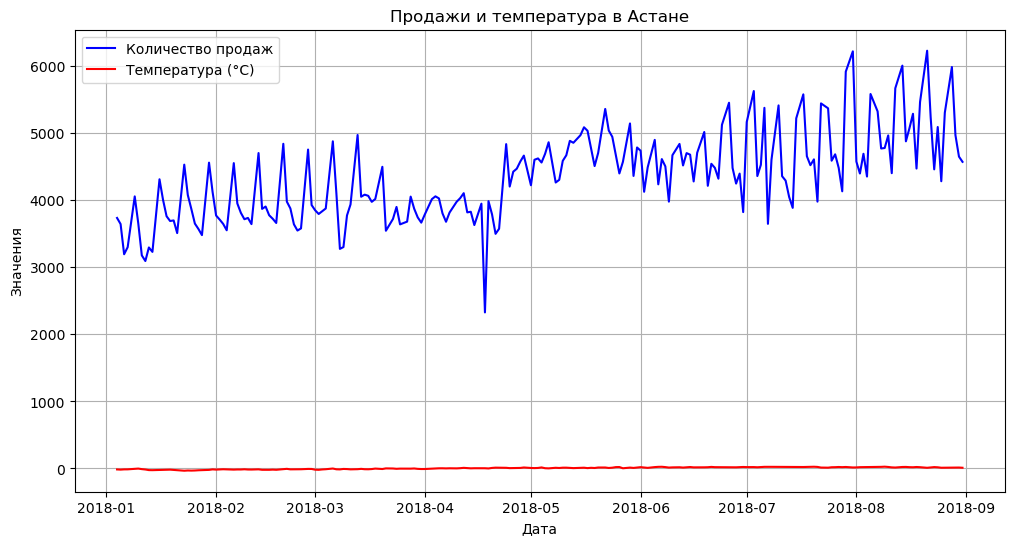

In [38]:
plt.figure(figsize=(12,6))
plt.plot(merged["Дата"], merged["Количество"], label="Количество продаж", color="blue")
plt.plot(merged["Дата"], merged["T"], label="Температура (°C)", color="red")

plt.xlabel("Дата")
plt.ylabel("Значения")
plt.title("Продажи и температура в Астане")
plt.legend()
plt.grid(True)
plt.show()


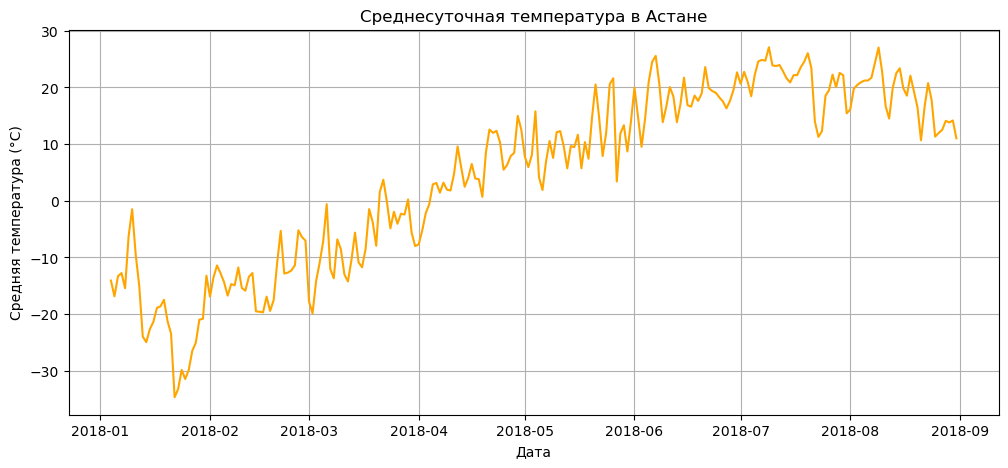

In [37]:
plt.figure(figsize=(12,5))
plt.plot(daily_temp["Дата"], daily_temp["T"], color="orange")
plt.xlabel("Дата")
plt.ylabel("Средняя температура (°C)")
plt.title("Среднесуточная температура в Астане")
plt.grid(True)
plt.show()